<a href="https://colab.research.google.com/github/ezradenia/Data-Analyst-Python/blob/main/Python_Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

In [34]:
# Mendefinisikan data p
df = pd.read_csv("airquality.csv")
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26
149,150,NaN,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.5 KB


### Deteksi Outliers Handling Multivariate outlier dengan Menghitung Jarak Mahalanobis

Mendeteksi outlier pada kolom Solar.R dan Wind?

In [9]:
df_SW = df[["Solar.R","Wind"]]
df_SW = df_SW.dropna(axis=0,how="any")

In [10]:
df_SW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 152
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Solar.R  146 non-null    float64
 1   Wind     146 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [11]:
df_SW = df_SW.to_numpy()

In [21]:
#covariance matrix 
covariance = np.cov(df_SW, rowvar=False)

#covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance,-1)

#center point
centerpoint = np.mean(df_SW, axis=0)

In [25]:
#jarak antara center point dengan masing -masing point observasi 
distances =[]
for i in df_SW:
  P1 = i
  P2 = centerpoint
  distance = (P1-P2).T.dot(covariance_pm1).dot(P1-P2)
  distances.append(distance)

In [32]:
#Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df_SW.shape[1])

# Index Outliers 
outlier_index = np.where(distances > cutoff)
print("Outlier index: ", outlier_index)

#Outlier
outlier = df_SW[distances > cutoff]
print("Outlier: ", outlier)

Outlier index:  (array([  6,  14,  18,  43,  48, 140]),)
Outlier:  [[ 19.   20.1]
 [ 78.   18.4]
 [320.   16.6]
 [284.   20.7]
 [ 59.    1.7]
 [ 20.   16.6]]


In [51]:
#remove outlier
#data_without_outlier = df_SW[distances<= cutoff]
#data_without_outlier

### Gunakan data winequalityN.csv untuk Case 2
Informasi apa yang dapat kamu berikan tentang data tersebut sebelum dilakukan analisis?

In [37]:
df2 = pd.read_csv("winequalityN.csv")
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Deteksi Univariate Outlier dengan Menghitung IQR (Inter Quartile Range)

Apakah ada outlier pada kolom alcohol?

In [38]:
df2 = pd.read_csv("winequalityN.csv")
df2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Text(0.5, 0, 'Sample')

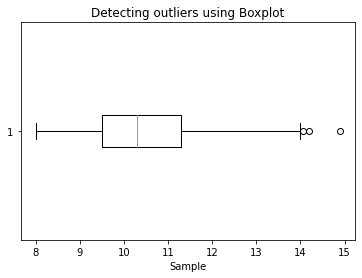

In [41]:
#mendeteksi outliers
alcohol = list(df2["alcohol"])
plt.boxplot(alcohol, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Sample")

Berdasarkan boxplot di atas, terdapat 3 titik nilai yang berada di luar boxplot sehingga dapat diindikasikan sebagai outlier

Jika terdeteksi outlier, atasi outlier tersebut ya! Tunjukkan nilai mana saja yang dianggap sebagai outlier!

In [42]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(alcohol)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [14.05, 14.2, 14.9]


In [52]:
#Trimming
tr = []
for j in alcohol:
  f = j in sample_outliers
  if f is False:
    tr.append(j)
#print(tr)

In [46]:
len(alcohol),len(tr)

(6497, 6494)

Dapat dilihat jumlah data antara alcohol dengan tr berbeda. Hal ini karena pada data tr 3 nilai outlier sudah di trim, sehingga yang awalnya data berjumlah 6497 berkurang menjadi 6494

In [47]:
print(statistics.mean(alcohol),statistics.mean(tr),statistics.median(alcohol),statistics.median(tr))

10.491800831149453 10.49000307976255 10.3 10.3


Dikarenakan nilai mean dan median antara data alcohol dengan tr tidak berbeda jauh dan mirip, maka untuk handling outlier data alcohol akan dilakukan dengan mengganti nilai outliers dengan nilai rata-rata

In [48]:
#Replace outlier dengan nilai rata-rata 
e = []
for y in alcohol:
  ff = y in sample_outliers
  if ff is True:
    y = statistics.mean(alcohol)
  else:
    y=y
  e.append(y)

In [53]:
#print(e)

Text(0.5, 0, 'Sample')

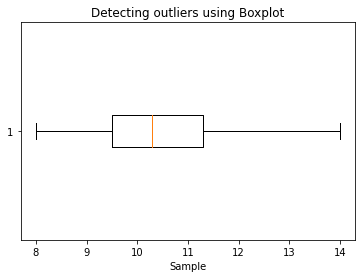

In [50]:
plt.boxplot(e, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Sample")